[*********************100%***********************]  1 of 1 completed
2015-04-04 00:00:00: Comprei 3.9417 BTC a 253.70, saldo em reais: 0.00
2015-04-05 00:00:00: Comprei 0.0000 BTC a 260.60, saldo em reais: 0.00
2015-04-06 00:00:00: Comprei 0.0000 BTC a 255.49, saldo em reais: 0.00
2015-04-07 00:00:00: Comprei 0.0000 BTC a 253.18, saldo em reais: 0.00
2015-04-08 00:00:00: Comprei 0.0000 BTC a 245.02, saldo em reais: 0.00
2015-04-09 00:00:00: Comprei 0.0000 BTC a 243.68, saldo em reais: 0.00
2015-04-10 00:00:00: Comprei 0.0000 BTC a 236.07, saldo em reais: 0.00
2015-04-11 00:00:00: Comprei 0.0000 BTC a 236.55, saldo em reais: 0.00
2015-04-12 00:00:00: Comprei 0.0000 BTC a 236.15, saldo em reais: 0.00
2015-04-13 00:00:00: Comprei 0.0000 BTC a 224.59, saldo em reais: 0.00
2015-04-14 00:00:00: Comprei 0.0000 BTC a 219.16, saldo em reais: 0.00
2015-04-15 00:00:00: Comprei 0.0000 BTC a 223.83, saldo em reais: 0.00
2015-04-16 00:00:00: Comprei 0.0000 BTC a 228.57, saldo em reais: 0.00
2015-04-

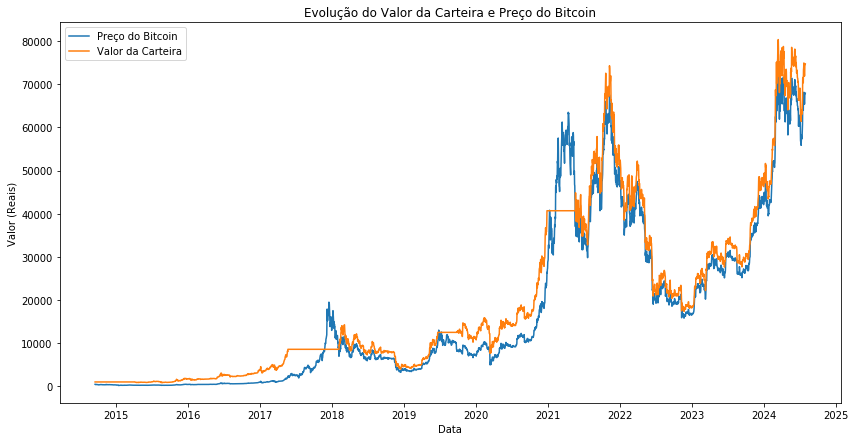

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Função para obter os dados históricos do Bitcoin
def get_btc_data():
    btc = yf.download('BTC-USD', start='2014-01-01')
    return btc['Close']

# Função para calcular o Índice Mayer
def calculate_mayer_index(prices, window=200):
    ma200 = prices.rolling(window=window).mean()
    mayer_index = prices / ma200
    return mayer_index

# Função para simular a estratégia de investimento
def simulate_strategy(starting_balance, prices, mayer_index):
    balance = starting_balance
    btc_balance = 0
    portfolio_values = []
    
    for date, price in prices.items():
        index_value = mayer_index[date]
        
        # Comprar BTC quando o índice Mayer estiver abaixo de 1
        if index_value < 1:
            btc_to_buy = balance / price
            btc_balance += btc_to_buy
            balance -= btc_to_buy * price
            print(f"{date}: Comprei {btc_to_buy:.4f} BTC a {price:.2f}, saldo em reais: {balance:.2f}")
        
        # Vender BTC quando o índice Mayer estiver acima de 2
        elif index_value > 2 and btc_balance > 0:
            balance += btc_balance * price
            print(f"{date}: Vendi {btc_balance:.4f} BTC a {price:.2f}, saldo em reais: {balance:.2f}")
            btc_balance = 0
        
        # Valor atual da carteira
        portfolio_value = balance + btc_balance * price
        portfolio_values.append((date, portfolio_value))
    
    # Valor final da carteira
    final_value = balance + btc_balance * prices.iloc[-1]
    return pd.DataFrame(portfolio_values, columns=['Date', 'Portfolio Value']).set_index('Date'), final_value

# Parâmetros
starting_balance = 1000

# Obtendo os dados históricos do Bitcoin
prices = get_btc_data()

# Calculando o índice Mayer
mayer_index = calculate_mayer_index(prices)

# Simulando a estratégia
portfolio_values, final_value = simulate_strategy(starting_balance, prices, mayer_index)
print(f"Valor final da carteira: {final_value:.2f} reais")

# Plotando o gráfico
plt.figure(figsize=(14, 7))
plt.plot(prices.index, prices, label='Preço do Bitcoin')
plt.plot(portfolio_values.index, portfolio_values['Portfolio Value'], label='Valor da Carteira')
plt.title('Evolução do Valor da Carteira e Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Valor (Reais)')
plt.legend()
plt.show()


In [ ]:
#testando uma média de 90 dias

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Função para obter os dados históricos do Bitcoin
def get_btc_data():
    btc = yf.download('BTC-USD', start='2014-01-01')
    return btc['Close']

# Função para calcular o Índice Mayer
def calculate_mayer_index(prices, window=90):
    ma90 = prices.rolling(window=window).mean()
    mayer_index = prices / ma90
    return mayer_index

# Função para simular a estratégia de investimento
def simulate_strategy(starting_balance, prices, mayer_index):
    balance = starting_balance
    btc_balance = 0
    portfolio_values = []
    
    for date, price in prices.items():
        index_value = mayer_index[date]
        
        # Comprar BTC quando o índice Mayer estiver abaixo de 1
        if index_value < 0.8:
            btc_to_buy = balance / price
            btc_balance += btc_to_buy
            balance -= btc_to_buy * price
            print(f"{date}: Comprei {btc_to_buy:.4f} BTC a {price:.2f}, saldo em reais: {balance:.2f}")
        
        # Vender BTC quando o índice Mayer estiver acima de 2
        elif index_value > 2 and btc_balance > 0:
            balance += btc_balance * price
            print(f"{date}: Vendi {btc_balance:.4f} BTC a {price:.2f}, saldo em reais: {balance:.2f}")
            btc_balance = 0
        
        # Valor atual da carteira
        portfolio_value = balance + btc_balance * price
        portfolio_values.append((date, portfolio_value))
    
    # Valor final da carteira
    final_value = balance + btc_balance * prices.iloc[-1]
    return pd.DataFrame(portfolio_values, columns=['Date', 'Portfolio Value']).set_index('Date'), final_value

# Parâmetros
starting_balance = 1000

# Obtendo os dados históricos do Bitcoin
prices = get_btc_data()

# Calculando o índice Mayer
mayer_index = calculate_mayer_index(prices)

# Simulando a estratégia
portfolio_values, final_value = simulate_strategy(starting_balance, prices, mayer_index)
print(f"Valor final da carteira: {final_value:.2f} reais")

[*********************100%***********************]  1 of 1 completed
2015-01-03 00:00:00: Comprei 3.5577 BTC a 281.08, saldo em reais: 0.00
2015-01-04 00:00:00: Comprei 0.0000 BTC a 264.20, saldo em reais: 0.00
2015-01-05 00:00:00: Comprei 0.0000 BTC a 274.47, saldo em reais: 0.00
2015-01-10 00:00:00: Comprei 0.0000 BTC a 274.80, saldo em reais: 0.00
2015-01-11 00:00:00: Comprei 0.0000 BTC a 265.66, saldo em reais: 0.00
2015-01-12 00:00:00: Comprei 0.0000 BTC a 267.80, saldo em reais: 0.00
2015-01-13 00:00:00: Comprei 0.0000 BTC a 225.86, saldo em reais: 0.00
2015-01-14 00:00:00: Comprei 0.0000 BTC a 178.10, saldo em reais: 0.00
2015-01-15 00:00:00: Comprei 0.0000 BTC a 209.84, saldo em reais: 0.00
2015-01-16 00:00:00: Comprei 0.0000 BTC a 208.10, saldo em reais: 0.00
2015-01-17 00:00:00: Comprei 0.0000 BTC a 199.26, saldo em reais: 0.00
2015-01-18 00:00:00: Comprei 0.0000 BTC a 210.34, saldo em reais: 0.00
2015-01-19 00:00:00: Comprei 0.0000 BTC a 214.86, saldo em reais: 0.00
2015-01-

/home/zavanin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


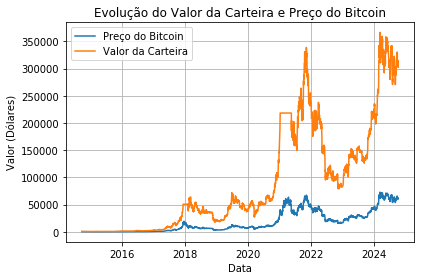

In [2]:
# Plotando o gráfico
# plt.figure(figsize=(14, 7))
plt.plot(prices.index, prices, label='Preço do Bitcoin')
plt.plot(portfolio_values.index, portfolio_values['Portfolio Value'], label='Valor da Carteira')
plt.title('Evolução do Valor da Carteira e Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Valor (Dólares)')
plt.legend()
# plt.show()
plt.grid(True)
plt.tight_layout()
plt.savefig('btc_comprando_e_vendendo_condicoes.png')